In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt
import datetime
import scipy.optimize as sco

C:\Users\Bright\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']
noa = len(stocks)

In [3]:
start_date = '01-01-2010'
end_date = '01-01-2017'

In [4]:
def download_data(stocks):
    data = wb.DataReader(stocks, data_source='yahoo', start=start_date, end=end_date)['Adj Close']
    data.columns = stocks
    return data

In [5]:
def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

In [6]:
def calculate_returns(data):
    returns = np.log(data/data.shift(1))
    return returns

In [7]:
def plot_daily_returns(returns):
    returns.plot(figsize=(10,5))
    plt.show()

In [8]:
def show_statistics(returns):
    print(returns.mean()*252)
    print(returns.cov()*252)

In [9]:
def initialize_weights():
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    return weights;

In [10]:
def calculate_portfolio_return(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    print("Expected portolio return:", portfolio_return);

In [11]:
def calculate_portfolio_variance(returns, weights):
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
    print("Expected variance:", portfolio_variance)

In [12]:
def generate_portfolios(weights, returns):
    
    preturns = []
    pvariances = []
    # Monte Carlo Simulations, generation of random weights
    for i in range(1000):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252, weights))))
    preturns=np.array(preturns)
    pvariances=np.array(pvariances)
    return preturns, pvariances

In [13]:
def plot_portfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances,returns,c=returns/variances,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.show
    
# this is the result of the simulation, now we have to find the optimal one

#### Portfolio Optimization

In [1]:
# finding the optimized portfolio
#the optimization technique !!! scipy can optimize functions(minimun/ maximum findings)

In [ ]:
def statistics(weights, returns):
    portfolio_return=np.sum(returns.mean()*weights)*252
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252, weights)))
    return np.array([portfolio_return, portfolio_volatility, portfolio_return/portfolio_volatility])

In [3]:
def statistics(weights, returns):
    portfolio_return=np.sum(returns.mean()*weights)*252
    portfolio_volatility=np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252, weights)))
    return np.array([portfolio_return, portfolio_volatility, portfolio_return/portfolio_volatility])

In [21]:
def min_func_sharpe(weights, returns):
    return -statistics(weights, returns)[2]

In [17]:
def print_optimal_portfolio(optimum, returns):
    print("Optimal weights:", optimum['x'].round(3))
    print("Expected return, volatility and Sharpe Ratio:", statistics(optimum['x'].round(3),returns))

In [18]:
def show_optimal_portfolio(optimum, returns, preturns, pvariance):
    plt.figure(figsize=(10,6))
    plt.scatter(pvariance,preturns,c=preturns/pvariances,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Volatility')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(optimum['x'],returns)[1],statistics(optimum['x'],returns)[0],'g*',markersize=20.0)

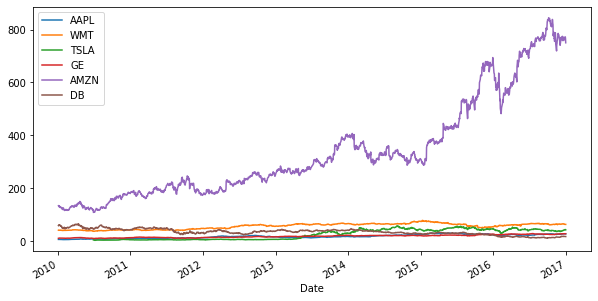

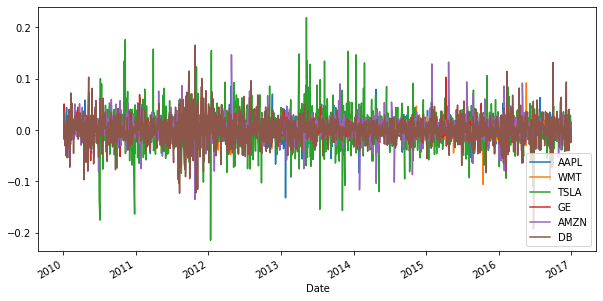

AAPL    0.203962
WMT     0.060359
TSLA    0.336881
GE      0.135330
AMZN    0.246535
DB     -0.174779
dtype: float64
          AAPL       WMT      TSLA        GE      AMZN        DB
AAPL  0.068795  0.009859  0.029641  0.021861  0.027812  0.036297
WMT   0.009859  0.026701  0.010949  0.013018  0.010755  0.020153
TSLA  0.029641  0.010949  0.274985  0.027283  0.047326  0.052331
GE    0.021861  0.013018  0.027283  0.047376  0.025830  0.054800
AMZN  0.027812  0.010755  0.047326  0.025830  0.104095  0.045055
DB    0.036297  0.020153  0.052331  0.054800  0.045055  0.175733
Expected portolio return: 0.18639483547663913
Expected variance: 0.2467045576121111


AttributeError: 'numpy.ndarray' object has no attribute 'cov'

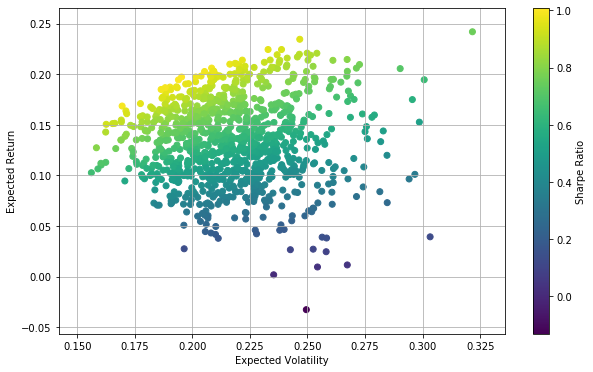

In [19]:
data = download_data(stocks)
show_data(data)
returns = calculate_returns(data)
plot_daily_returns(returns)
show_statistics(returns)
weights = initialize_weights()
calculate_portfolio_return(returns, weights)
calculate_portfolio_variance(returns, weights)
returns, variances = generate_portfolios(weights, returns)
plot_portfolios(returns, variances)
statistics(weights, returns)
min_func_sharpe(weights, returns)
optimum = optimize_portfolio(weights, returns)
print_optimal_portfolio(optimum, returns)
show_optimal_portfolio(optimum, returns, preturns, pvariance)

In [22]:
a = pd.Series([5,2,6],[5,6,8])

In [23]:
a

5    5
6    2
8    6
dtype: int64

In [24]:

b = pd.Series([9,7,8],[8,6,3])

In [25]:
b

8    9
6    7
3    8
dtype: int64

In [26]:
c = a,b.cov()

TypeError: cov() missing 1 required positional argument: 'other'

In [ ]:
a.cov()